# 연습문제 문제2

## #01. 작업준비

### 패키지 설치

In [175]:
import sys
sys.path.append("../../")

from statsmodels.tsa.stattools import adfuller
from datetime import datetime as dt
from datetime import timedelta
from pandas import read_excel, to_datetime
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA 
from pmdarima.arima import auto_arima
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from helper import set_datetime_index, exp_time_data

### 데이터 가져오기

In [176]:
df = read_excel("https://data.hossam.kr/E06/newborn.xlsx", index_col='시점')
df

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,,,,
1981년 01월,21461,7846,3547,2886,NaN,NaN,NaN,NaN,9685,3729,3002,6293,4956,8741,7454,7501,1050
1981년 02월,23389,8622,3588,3044,NaN,NaN,NaN,NaN,10352,3637,3161,7761,5326,8319,7446,8039,872
1981년 03월,15042,6284,2885,2456,NaN,NaN,NaN,NaN,7727,3158,2486,5214,3855,7566,6229,6714,805
1981년 04월,15231,5806,2783,2369,NaN,NaN,NaN,NaN,7321,3166,2230,4621,3634,6553,5548,6079,752
1981년 05월,16239,6225,2808,2468,NaN,NaN,NaN,NaN,7823,3234,2419,4879,3709,6564,5529,6222,821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023년 01월,4079,1303,905,1428,626.0,675.0,519.0,313.0,6957,675,698,921,687,780,1041,1230,345
2023년 02월,3284,1130,801,1187,588.0,650.0,436.0,278.0,5979,602,636,805,539,671,942,1139,272
2023년 03월,3605,1170,905,1219,572.0,658.0,489.0,255.0,6306,640,725,826,589,714,923,1256,286


## #02. 데이터 정제

### 결측치 '0'으로 처리

In [177]:
df.fillna(0, inplace=True)

In [178]:
df.head()

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,,,,
1981년 01월,21461,7846,3547,2886,0.0,0.0,0.0,0.0,9685,3729,3002,6293,4956,8741,7454,7501,1050
1981년 02월,23389,8622,3588,3044,0.0,0.0,0.0,0.0,10352,3637,3161,7761,5326,8319,7446,8039,872
1981년 03월,15042,6284,2885,2456,0.0,0.0,0.0,0.0,7727,3158,2486,5214,3855,7566,6229,6714,805
1981년 04월,15231,5806,2783,2369,0.0,0.0,0.0,0.0,7321,3166,2230,4621,3634,6553,5548,6079,752
1981년 05월,16239,6225,2808,2468,0.0,0.0,0.0,0.0,7823,3234,2419,4879,3709,6564,5529,6222,821


In [179]:
# 5년간의 자료 추출
df2 = df.tail(12*5)
df2.head()

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,,,,
2018년 06월,4603,1659,1188,1630,732.0,794.0,653.0,277.0,7089,633,846,1139,799,890,1341,1688,396
2018년 07월,4845,1522,1175,1644,717.0,757.0,672.0,344.0,7317,692,959,1195,810,902,1326,1754,402
2018년 08월,4925,1597,1196,1679,794.0,759.0,694.0,280.0,7383,700,882,1208,838,914,1351,1785,396
2018년 09월,4687,1476,1111,1631,741.0,712.0,657.0,293.0,7108,696,828,1190,818,913,1214,1605,386
2018년 10월,4689,1525,1151,1684,709.0,703.0,664.0,309.0,7358,673,808,1111,807,918,1263,1705,397


In [180]:
df2.columns

Index(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object')

In [181]:
# 데이터 타입 확인
df2.dtypes

서울특별시        int64
부산광역시        int64
대구광역시        int64
인천광역시        int64
광주광역시      float64
대전광역시      float64
울산광역시      float64
세종특별자치시    float64
경기도          int64
강원도          int64
충청북도         int64
충청남도         int64
전라북도         int64
전라남도         int64
경상북도         int64
경상남도         int64
제주특별자치도      int64
dtype: object

In [182]:
# float->int로 바꾸기
df2 = df2.astype({'광주광역시':'int','대전광역시':'int','울산광역시':'int','세종특별자치시':'int'})
df2.head()

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,,,,
2018년 06월,4603,1659,1188,1630,732,794,653,277,7089,633,846,1139,799,890,1341,1688,396
2018년 07월,4845,1522,1175,1644,717,757,672,344,7317,692,959,1195,810,902,1326,1754,402
2018년 08월,4925,1597,1196,1679,794,759,694,280,7383,700,882,1208,838,914,1351,1785,396
2018년 09월,4687,1476,1111,1631,741,712,657,293,7108,696,828,1190,818,913,1214,1605,386
2018년 10월,4689,1525,1151,1684,709,703,664,309,7358,673,808,1111,807,918,1263,1705,397


In [183]:
df2.dtypes

서울특별시      int64
부산광역시      int64
대구광역시      int64
인천광역시      int64
광주광역시      int32
대전광역시      int32
울산광역시      int32
세종특별자치시    int32
경기도        int64
강원도        int64
충청북도       int64
충청남도       int64
전라북도       int64
전라남도       int64
경상북도       int64
경상남도       int64
제주특별자치도    int64
dtype: object

In [188]:
# 전국에서 태어난 신생아의 수 = sum
for i in range(len(df2.index)):
    df2.loc[df2.index[i],'전국신생아수'] = df2.iloc[i].sum()

df2.head()

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국신생아수
시점,,,,,,,,,,,,,,,,,,
2018년 06월,4603,1659,1188,1630,732,794,653,277,7089,633,846,1139,799,890,1341,1688,396,26357.0
2018년 07월,4845,1522,1175,1644,717,757,672,344,7317,692,959,1195,810,902,1326,1754,402,27033.0
2018년 08월,4925,1597,1196,1679,794,759,694,280,7383,700,882,1208,838,914,1351,1785,396,27381.0
2018년 09월,4687,1476,1111,1631,741,712,657,293,7108,696,828,1190,818,913,1214,1605,386,26066.0
2018년 10월,4689,1525,1151,1684,709,703,664,309,7358,673,808,1111,807,918,1263,1705,397,26474.0


In [189]:
# 전국신생아수 데이터타입 변환
df2 = df2.astype({'전국신생아수':'int'})
df2.head()

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국신생아수
시점,,,,,,,,,,,,,,,,,,
2018년 06월,4603,1659,1188,1630,732,794,653,277,7089,633,846,1139,799,890,1341,1688,396,26357
2018년 07월,4845,1522,1175,1644,717,757,672,344,7317,692,959,1195,810,902,1326,1754,402,27033
2018년 08월,4925,1597,1196,1679,794,759,694,280,7383,700,882,1208,838,914,1351,1785,396,27381
2018년 09월,4687,1476,1111,1631,741,712,657,293,7108,696,828,1190,818,913,1214,1605,386,26066
2018년 10월,4689,1525,1151,1684,709,703,664,309,7358,673,808,1111,807,918,1263,1705,397,26474


In [190]:
# 필요한 데이터만 추출
df3 = df2.filter(['전국신생아수'])
df3.head()

,전국신생아수
시점,
2018년 06월,26357
2018년 07월,27033
2018년 08월,27381
2018년 09월,26066
2018년 10월,26474


In [191]:
# 날짜타입 형 변환

In [192]:
# spl=[]
# for x in df3.index[0].split(" "):
#    spl.append("".join([y for y in x if y.isnumeric()]))

# date=f'{spl[0]}-{spl[1]}-01'
# date=pd.to_datetime(date)
# # 최종모양
# "YYYY-MM-DD"


In [193]:
date_dic=dict.fromkeys(df3.index)

In [194]:
for dt in date_dic.keys():
    spl=[]
    for x in dt.split(" "):
        spl.append("".join([y for y in x if y.isnumeric()]))
    date=f'{spl[0]}-{spl[1]}-01'
    date= to_datetime(date)
    date_dic[dt]=date

In [195]:
step1=df3.reset_index()
step1["index"]=step1["시점"].apply(lambda x:date_dic[x])

In [196]:
step1.head()

,시점,전국신생아수,index
0,2018년 06월,26357,2018-06-01
1,2018년 07월,27033,2018-07-01
2,2018년 08월,27381,2018-08-01
3,2018년 09월,26066,2018-09-01
4,2018년 10월,26474,2018-10-01


In [197]:
# 시점 컬럼 삭제
df4 = step1.drop('시점',axis = 1)

In [ ]:
df4.set_index('index',inplace=True)

In [216]:
df4.index.name=None

## #03. ADF 검정 (정상성여부 검사)

In [224]:
ar = adfuller(df4)
ar[1]

0.024488684286930937

#### 0.05보다 작으므로 정상성여부 충족 확인

In [ ]:
# 시각화로 정상성 여부 확인해보기
plt.figure()


## #04. ACF, PACF 검정(정상성 만족여부 확인 및 모델 확인)

In [200]:
# 그래프 초기화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

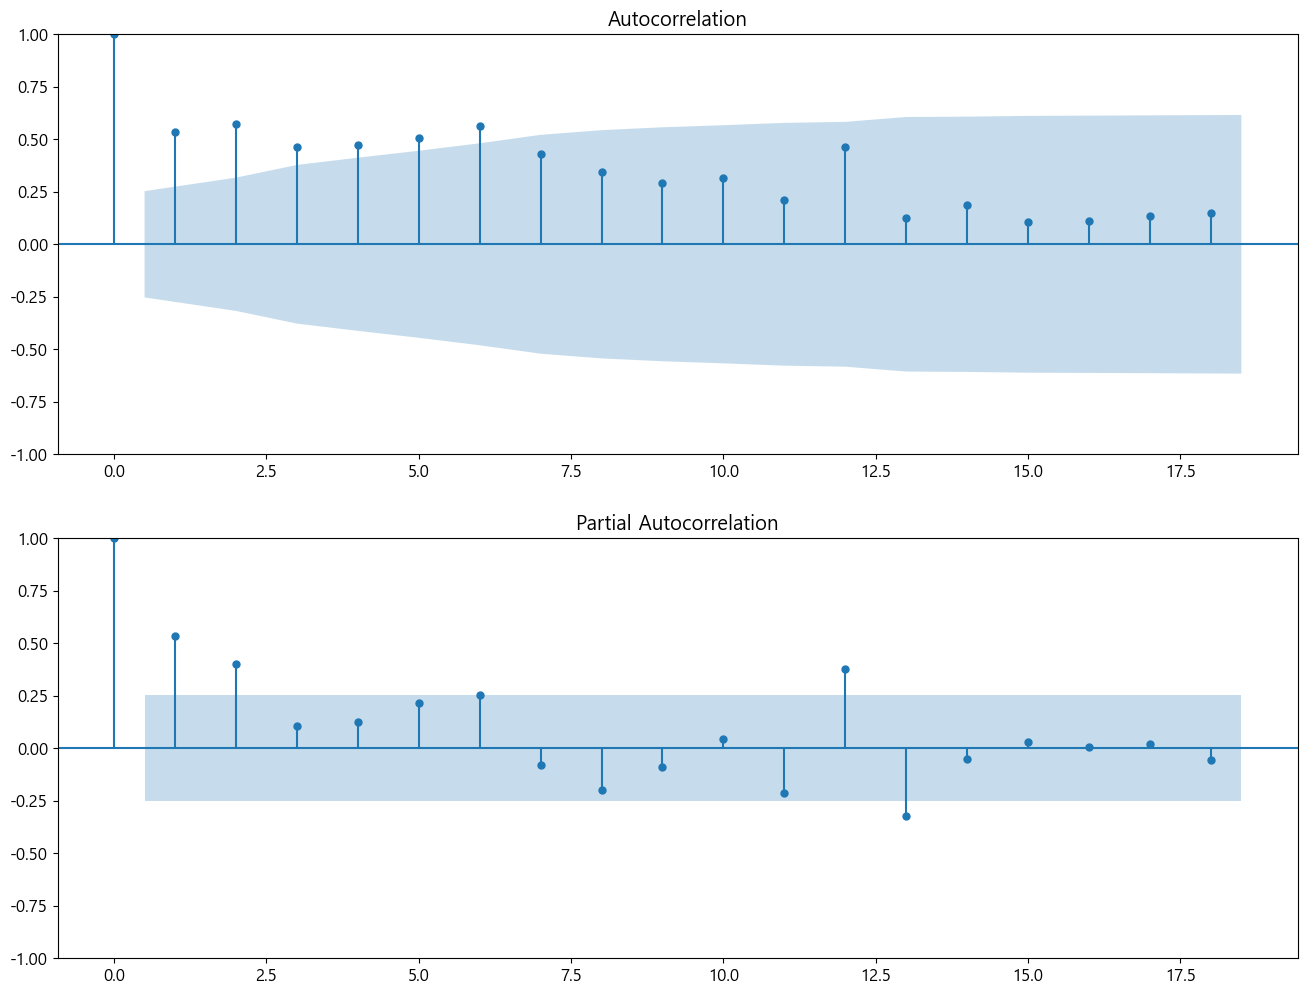

In [225]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,12))

plot_acf(df4['전국신생아수'], ax=ax1)
plot_pacf(df4['전국신생아수'], ax=ax2)
plt.show()
plt.close()

AR(3) 모델 채택

p,d,q = 3,0,0

## #05. ARIMA 분석

### 분석모델 만들기

In [242]:
model = ARIMA(df4['전국신생아수'], order=(3,0,0), seasonal_order=)
fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 전국신생아수   No. Observations:                   60
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -540.442
Date:                Tue, 08 Aug 2023   AIC                           1090.884
Time:                        22:32:03   BIC                           1101.356
Sample:                    06-01-2018   HQIC                          1094.980
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.28e+04   1752.757     13.005      0.000    1.94e+04    2.62e+04
ar.L1          0.2368      0.177      1.339      0.181      -0.110       0.583
ar.L2          0.4268      0.238      1.792      0.0

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### 학습모델에 대한 예측치

In [252]:
fv = round(fit.fittedvalues)
fv

2018-06-01    22795.0
2018-07-01    25033.0
2018-08-01    25894.0
2018-09-01    26328.0
2018-10-01    26286.0
2018-11-01    25884.0
2018-12-01    25545.0
2019-01-01    24517.0
2019-02-01    25002.0
2019-03-01    26671.0
2019-04-01    26386.0
2019-05-01    25916.0
2019-06-01    25562.0
2019-07-01    24740.0
2019-08-01    24329.0
2019-09-01    24419.0
2019-10-01    24209.0
2019-11-01    24297.0
2019-12-01    24450.0
2020-01-01    23327.0
2020-02-01    23205.0
2020-03-01    24149.0
2020-04-01    23800.0
2020-05-01    23503.0
2020-06-01    23272.0
2020-07-01    22747.0
2020-08-01    22563.0
2020-09-01    22668.0
2020-10-01    22831.0
2020-11-01    22809.0
2020-12-01    21883.0
2021-01-01    20715.0
2021-02-01    21455.0
2021-03-01    22773.0
2021-04-01    22803.0
2021-05-01    22989.0
2021-06-01    22752.0
2021-07-01    22100.0
2021-08-01    21986.0
2021-09-01    22258.0
2021-10-01    22288.0
2021-11-01    21839.0
2021-12-01    21060.0
2022-01-01    19833.0
2022-02-01    20310.0
2022-03-01

### 학습한 모델을 토대로 5년치 간의 예상치 생성

In [251]:
fc = round(fit.forecast(12*5))
fc.head()

2023-06-01    19757.0
2023-07-01    19678.0
2023-08-01    20078.0
2023-09-01    20277.0
2023-10-01    20480.0
Freq: MS, Name: predicted_mean, dtype: float64

### 시각화

In [248]:
last = df4.index.max()
xmin = last - relativedelta(months=12)
xmax = last + relativedelta(months=12*5)
ymax = df4['전국신생아수'][xmin:xmax].max()
ymin = df4['전국신생아수'][xmin:xmax].min()
xmin, xmax, ymax, ymin

(Timestamp('2022-05-01 00:00:00'),
 Timestamp('2028-05-01 00:00:00'),
 23182,
 16804)

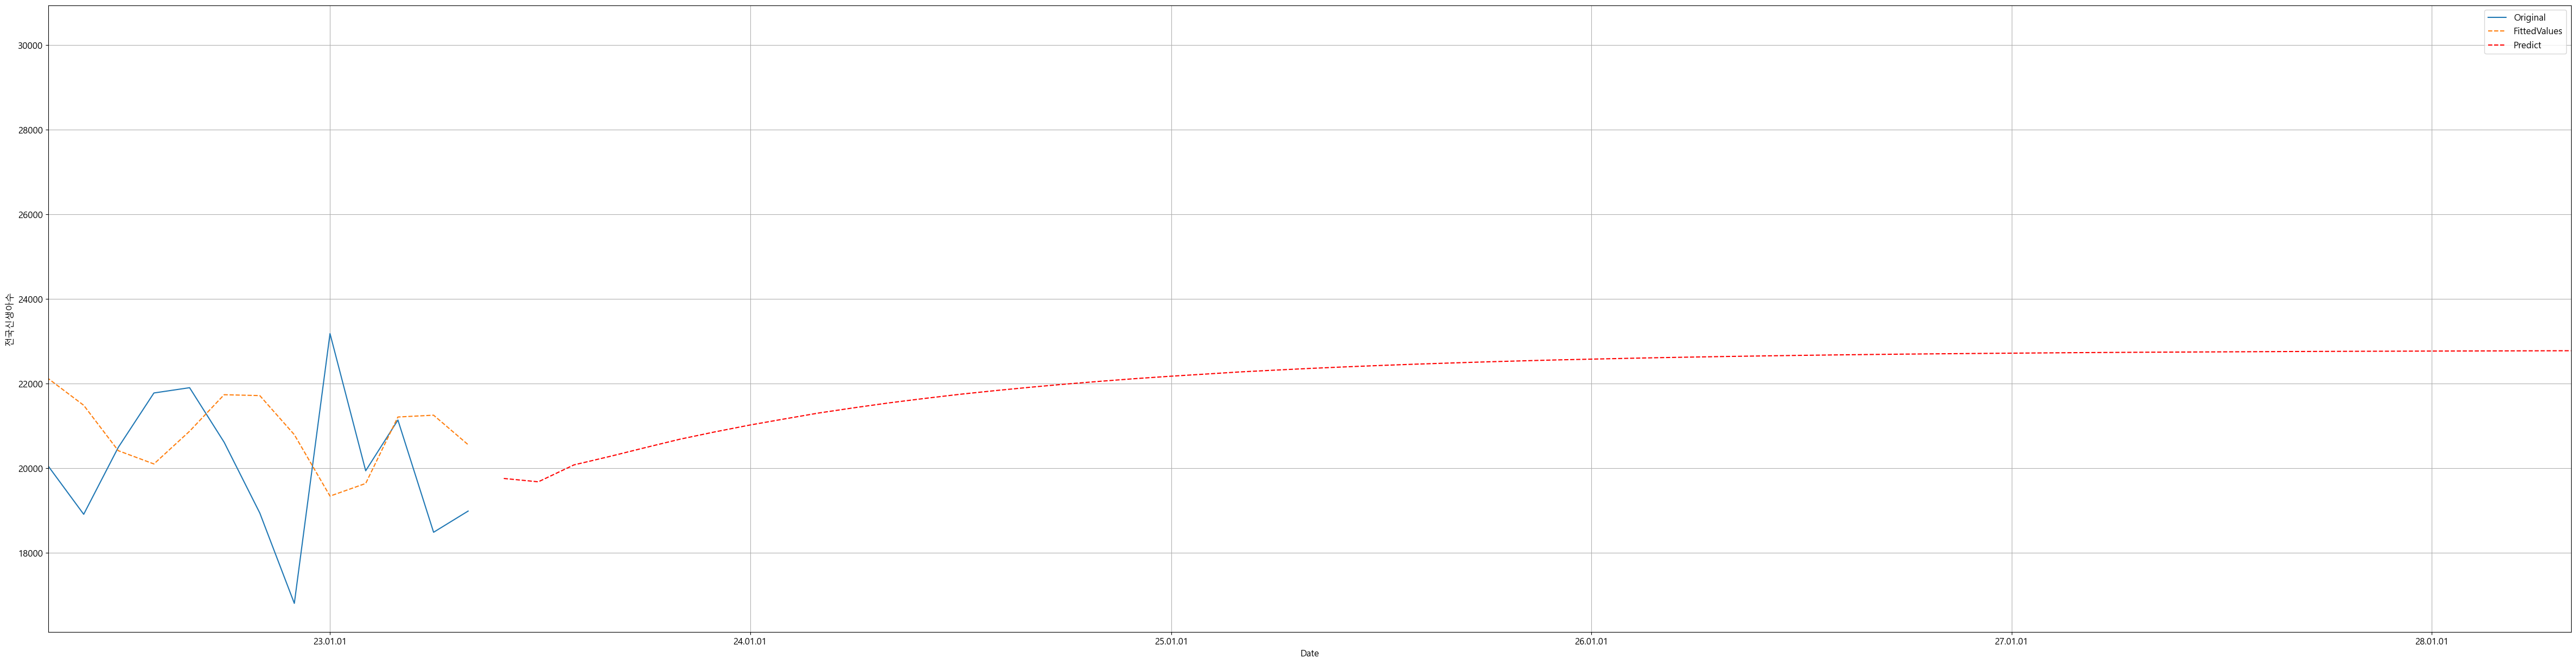

In [256]:
plt.figure(figsize=(60,15))

#원본데이터
sb.lineplot(data=df4, x=df4.index, y='전국신생아수', label='Original')

#원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

#향후 5년간의 예측값
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Date')
plt.ylabel('전국신생아수')
plt.legend()

plt.xlim([xmin,xmax])

#그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()